# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st

# Import API key
from config import api_key_OWM

 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={api_key_OWM}&q="

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# Lists for holding data
lat_lngs = []
cities = []
temp = []
humid = []
cloud = []
wind_speed = []
city_name = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
lat = []
long = []
city_count = 1
total_cities = len(cities)
country = []

# Build partial query URL
query_url = f"{url}appid={api_key_OWM}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()

    print(f"City request number: {city_count} of {total_cities} | {city}")
    
    try:
        city_count = city_count+1
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
    except (KeyError, IndexError):
        print(f"Missing data for city number:{city_count}")
        pass
        
    
      
print("Data retrieval finalised")
print("------------------------------")


City request number: 1 of 627 | maragogi
City request number: 2 of 627 | san andres
City request number: 3 of 627 | meulaboh
City request number: 4 of 627 | irving
City request number: 5 of 627 | stara vyzhivka
City request number: 6 of 627 | kodiak
City request number: 7 of 627 | villarrica
City request number: 8 of 627 | mar del plata
City request number: 9 of 627 | vilyuysk
City request number: 10 of 627 | rikitea
City request number: 11 of 627 | mataura
City request number: 12 of 627 | bluff
City request number: 13 of 627 | arraial do cabo
City request number: 14 of 627 | warwick
City request number: 15 of 627 | lima
City request number: 16 of 627 | albany
City request number: 17 of 627 | san jose
City request number: 18 of 627 | chokurdakh
City request number: 19 of 627 | belushya guba
Missing data for city number:20
City request number: 20 of 627 | laredo
City request number: 21 of 627 | bredasdorp
City request number: 22 of 627 | pangnirtung
City request number: 23 of 627 | jame

City request number: 181 of 627 | nikolskoye
City request number: 182 of 627 | vila franca do campo
City request number: 183 of 627 | little current
City request number: 184 of 627 | brigham city
City request number: 185 of 627 | upernavik
City request number: 186 of 627 | bengkulu
City request number: 187 of 627 | marienburg
City request number: 188 of 627 | bullhead city
City request number: 189 of 627 | lethem
City request number: 190 of 627 | hilo
City request number: 191 of 627 | zhigansk
City request number: 192 of 627 | hithadhoo
City request number: 193 of 627 | veraval
City request number: 194 of 627 | leningradskiy
City request number: 195 of 627 | ternate
City request number: 196 of 627 | severo-kurilsk
City request number: 197 of 627 | fuxin
City request number: 198 of 627 | pouembout
City request number: 199 of 627 | hofn
City request number: 200 of 627 | arlit
City request number: 201 of 627 | benicarlo
City request number: 202 of 627 | north platte
City request number: 2

City request number: 363 of 627 | diamantino
City request number: 364 of 627 | nargana
City request number: 365 of 627 | surt
City request number: 366 of 627 | araouane
City request number: 367 of 627 | lorengau
City request number: 368 of 627 | aykhal
City request number: 369 of 627 | kulhudhuffushi
City request number: 370 of 627 | simbahan
City request number: 371 of 627 | airai
City request number: 372 of 627 | imeni poliny osipenko
City request number: 373 of 627 | mecca
City request number: 374 of 627 | ocampo
City request number: 375 of 627 | pozhva
City request number: 376 of 627 | jonuta
City request number: 377 of 627 | tunxi
Missing data for city number:378
City request number: 378 of 627 | barguzin
City request number: 379 of 627 | mizdah
City request number: 380 of 627 | anicuns
City request number: 381 of 627 | talnakh
City request number: 382 of 627 | berlevag
City request number: 383 of 627 | rosoman
City request number: 384 of 627 | kamaishi
City request number: 385 of

City request number: 538 of 627 | nizhneyansk
Missing data for city number:539
City request number: 539 of 627 | williston
City request number: 540 of 627 | varadero
City request number: 541 of 627 | tecoanapa
City request number: 542 of 627 | hirara
City request number: 543 of 627 | formoso do araguaia
Missing data for city number:544
City request number: 544 of 627 | westport
City request number: 545 of 627 | ponta do sol
City request number: 546 of 627 | valley city
City request number: 547 of 627 | tocopilla
City request number: 548 of 627 | plettenberg bay
City request number: 549 of 627 | paamiut
City request number: 550 of 627 | santa eulalia del rio
Missing data for city number:551
City request number: 551 of 627 | soyo
City request number: 552 of 627 | camopi
City request number: 553 of 627 | kalabo
City request number: 554 of 627 | le pont-de-claix
City request number: 555 of 627 | harper
City request number: 556 of 627 | palmer
City request number: 557 of 627 | nanortalik
Ci

In [41]:
#create dict for all this data to go into so we can make DF for scatter plot
weather_dict = {"city": city_name,"Country":country,"lat": lat,"long":long,"temp": temp,"humidity":humid,"cloudiness":cloud,"wind speed":wind_speed}
len(lat)

578

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
#export data to csv
output_data_file = "cities.csv"

In [43]:
#display dataframe 
city_data = pd.DataFrame(weather_dict)
city_data.head()

,city,Country,lat,long,temp,humidity,cloudiness,wind speed
0,Maragogi,BR,-9.01,-35.22,299.72,73,16,4.69
1,San Andrés,CO,12.58,-81.70,301.15,88,75,6.20
2,Meulaboh,ID,4.14,96.13,300.55,77,92,1.20
3,Irving,US,32.81,-96.95,299.97,74,90,5.70
4,Stara Vyzhivka,UA,51.44,24.44,295.42,56,50,2.26


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
#convert Kelvin to Farenheit --this is allgood to use in final 
faren = (city_data["temp"]- 273.15) * 9/5 + 32
faren

0      79.826
1      82.400
2      81.320
3      80.276
4      72.086
        ...  
573    46.400
574    84.200
575    49.388
576    62.060
577    71.600
Name: temp, Length: 578, dtype: float64

In [48]:
#add the kelvin conversion into the dict and make new dataframe again
weather_dict_rev = {"City": city_name,"Country":country,"lat": lat,"long":long,"temp": faren,"humidity":humid,"cloudiness":cloud,"wind speed":wind_speed}
weather_df = pd.DataFrame(weather_dict_rev)
weather_df

,City,Country,lat,long,temp,humidity,cloudiness,wind speed
0,Maragogi,BR,-9.01,-35.22,79.826,73,16,4.69
1,San Andrés,CO,12.58,-81.70,82.400,88,75,6.20
2,Meulaboh,ID,4.14,96.13,81.320,77,92,1.20
3,Irving,US,32.81,-96.95,80.276,74,90,5.70
4,Stara Vyzhivka,UA,51.44,24.44,72.086,56,50,2.26
...,...,...,...,...,...,...,...,...
573,Coquimbo,CL,-29.95,-71.34,46.400,100,90,2.10
574,Guilin,CN,25.28,110.29,84.200,79,42,1.00
575,Chivay,PE,-15.64,-71.60,49.388,42,0,1.41
576,Kristinehamn,SE,59.31,14.11,62.060,100,94,1.97


In [49]:
weather_data = weather_df.loc[weather_df["humidity"]<100]
weather_data

,City,Country,lat,long,temp,humidity,cloudiness,wind speed
0,Maragogi,BR,-9.01,-35.22,79.826,73,16,4.69
1,San Andrés,CO,12.58,-81.70,82.400,88,75,6.20
2,Meulaboh,ID,4.14,96.13,81.320,77,92,1.20
3,Irving,US,32.81,-96.95,80.276,74,90,5.70
4,Stara Vyzhivka,UA,51.44,24.44,72.086,56,50,2.26
...,...,...,...,...,...,...,...,...
571,Bridlington,GB,54.08,-0.19,61.268,82,100,5.10
572,Linxia Chengguanzhen,CN,35.60,103.21,67.082,62,65,1.40
574,Guilin,CN,25.28,110.29,84.200,79,42,1.00
575,Chivay,PE,-15.64,-71.60,49.388,42,0,1.41


# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#I believe this has been achieved with the overwriting of dataframe in weather_data

In [50]:
# Extract relevant fields from the data frame
weather_data.to_csv("weather_data.csv",index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

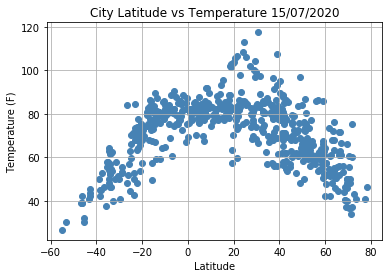

In [51]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o",color="steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature 15/07/2020")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureVsLatitudeWorldCities.png")

# Show plot
plt.show()

Observations for latitude vs temperature
A noticeable trend in the scatter plot is that the southern hemisphere cities do not get above 100degrees farenheit, and the northern hemisphere is experiencing higher temperatures from around latitude 20° to 40°

## Latitude vs. Humidity Plot

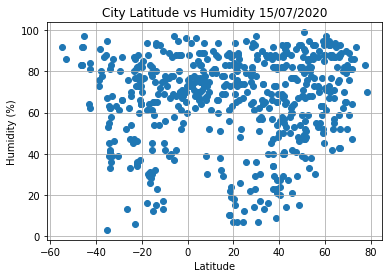

In [52]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity 15/07/2020")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("HumidityVsLatitudeWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

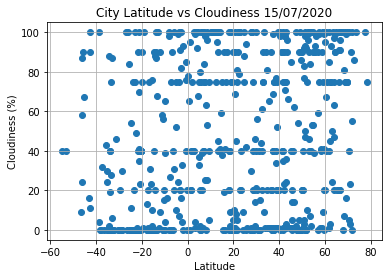

In [53]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness 15/07/2020")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("CloudinessVsLatitudeWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

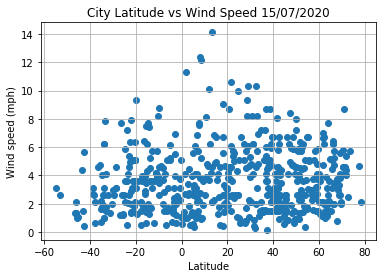

In [54]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed 15/07/2020")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("WindSpeedVsLatitudeWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [55]:
# OPTIONAL: Create a function to create Linear Regression plots

In [56]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[weather_data["lat"]>=0]
southern_df = weather_data.loc[weather_data["lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

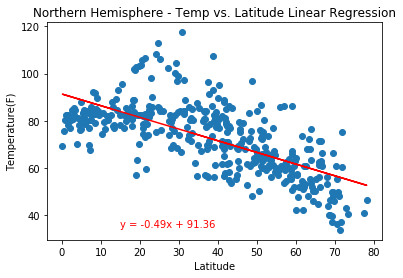

In [57]:
y = northern_df["temp"]
x = northern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Northern Hemisphere - Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.text(15,35, line_annotation, fontsize = 10, color="red");

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

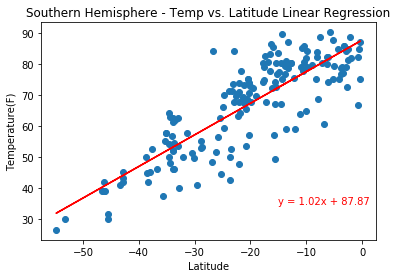

In [58]:
y = southern_df["temp"]
x = southern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Southern Hemisphere - Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.text(-15,35, line_annotation, fontsize = 10, color="red");

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

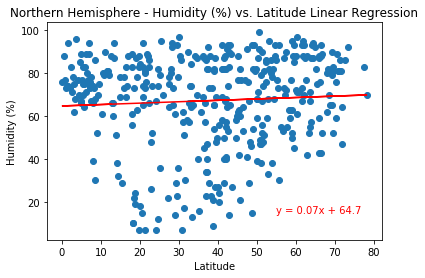

In [59]:
y = northern_df["humidity"]
x = northern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.text(55,15, line_annotation, fontsize = 10, color="red");

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

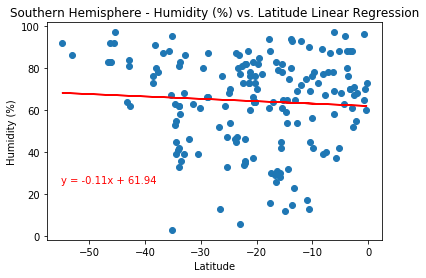

In [60]:
y = southern_df["humidity"]
x = southern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.text(-55,25, line_annotation, fontsize = 10, color="red");

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

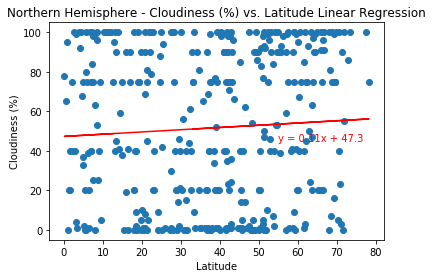

In [61]:
y = northern_df["cloudiness"]
x = northern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.text(55,45, line_annotation, fontsize = 10, color="red");

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

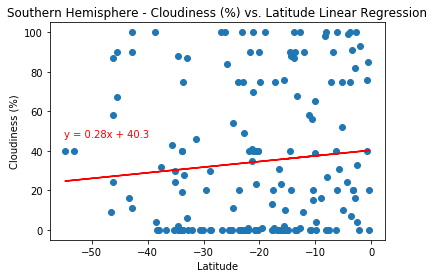

In [62]:
y = southern_df["cloudiness"]
x = southern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.text(-55,47, line_annotation, fontsize = 10, color="red");

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

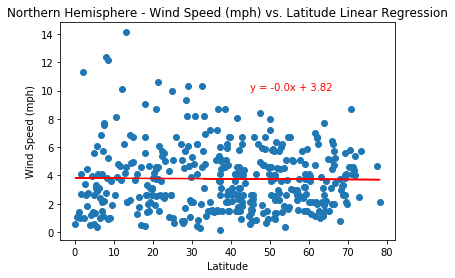

In [63]:
y = northern_df["wind speed"]
x = northern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.text(45,10, line_annotation, fontsize = 10, color="red");

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

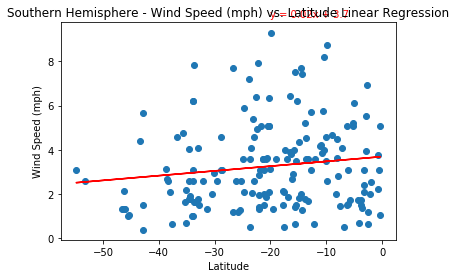

In [64]:
y = southern_df["wind speed"]
x = southern_df["lat"]

#plot scatter as above
plt.scatter(x,y, marker="o")

#calc the lin regression - refer daniels
slope, intercept,r_value,p_value,std_err = st.linregress(x,y)
regress_values = x * slope+ intercept

#plot a line ontop of scatter plot
plt.plot(x, regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y label
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.text(-20,10, line_annotation, fontsize = 10, color="red");